# For Loops in R

We don't need much programming skill to use R effectively for statistics and probability, but a little bit helps. The <span style = 'color:blue;font-weight:bold'> for loop</span> is quite helpful to generate probability distributions and investigate their properties.

## Simple For Loop

To see the basic features and requirements of a for loop, consider the following:

In [1]:
for (x in 1:7) {
  print(x)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7


Note that we have the following requirements:

1. An indexing variable (in this case $x$) that takes on each value from 1 to 7.
2. Brackets {} enclose the loop, e.g. the function(s) that need to be run repeatedly. 

## Function rflip

The function <span style = 'color:blue;font-weight:bold'>rflip()</span> simulates coin flips or, more generally, the binomial distribution. We can use this function to great effect, and the cell below will load it into active memory for this notebook.

In [2]:
rflip <- function(n=1, prob=.5, quiet=FALSE, verbose = !quiet, summarize = FALSE, 
                  summarise = summarize) {
	if ( ( prob > 1 && is.integer(prob) ) ) {  
		# swap n and prob
		temp <- prob
		prob <- n
		n <- temp
	}
	if (summarise) {
	  heads <- rbinom(1, n, prob)
	  return(data.frame(n = n, heads = heads, tails = n - heads, prob = prob))
	} else {
	  r <- rbinom(n,1,prob)
	  result <- c('T','H')[ 1 + r ]
	  heads <- sum(r)
	  attr(heads,"n") <- n
	  attr(heads,"prob") <- prob 
	  attr(heads,"sequence") <- result
	  attr(heads,"verbose") <- verbose
	  class(heads) <- 'cointoss'
	  return(heads)
	}
}

### Examples with rflip() Function

A few examples will help show why we imported the code for this function:

#### Basic Function for 20 Flips: Verbose Output

In [3]:
rflip(20, prob = 1/4)

[1] 5
attr(,"n")
[1] 20
attr(,"prob")
[1] 0.25
attr(,"sequence")
 [1] "T" "T" "T" "T" "H" "H" "T" "H" "T" "T" "T" "T" "T" "T" "T" "T" "T" "H" "H"
[20] "T"
attr(,"verbose")
[1] TRUE
attr(,"class")
[1] "cointoss"

#### Function Call for 20 Flips: Summary Output

```{hint}
Note that **heads** is synnomous with **successes** in the summary.
```

In [4]:
rflip(20, prob = 1/4, summarize = TRUE)

n,heads,tails,prob
20,5,15,0.25


#### Extracting Number of Successes from Summary Output

In [5]:
rflip(20, prob = 1/4, summarize = TRUE)[1,2]

[1] 4

## Example 2: For Loop with rflip() Function

We wish to flip 20 coins each with a 25\% chance of success. We use the FOR LOOP to repeat this a thousand times.

In [6]:
num_success <- c()       # create a vector to store the number of successes for each sample drawn
num_reps = 1000          # set the number of times to run the FOR LOOP

for (i in 1:num_reps){
    temp <- rflip(20, prob = 1/4, summarize = TRUE)[1,2]  # flip 20 coins, count numer of successes (heads)
    num_success[i] <- temp     # count and store the number of successes from this trial
}

head(num_success, 12)        # display results of first 20 trials

[1] 6 4 6 6 8 3 7 4 2 3 3 5

We can create a histogram of the results to see the shape of the distribution.

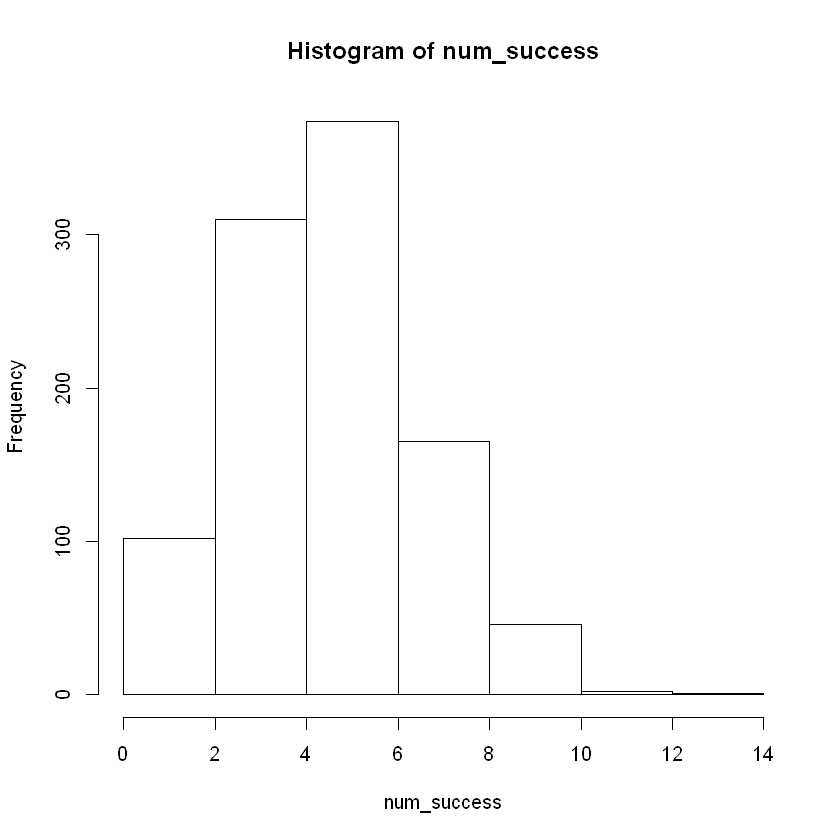

In [7]:
num_success <- c()       # create a vector to store the number of successes for each sample drawn
num_reps = 1000          # set the number of times to run the FOR LOOP

for (i in 1:num_reps){
    temp <- rflip(20, prob = 1/4, summarize = TRUE)[1,2]  # flip 20 coins, count numer of successes (heads)
    num_success[i] <- temp     # count and store the number of successes from this trial
}

hist(num_success, breaks = 8)     # display histogram of results from all trials

## Example 3: Add Lines on Histogram Displaying Middle 90\%

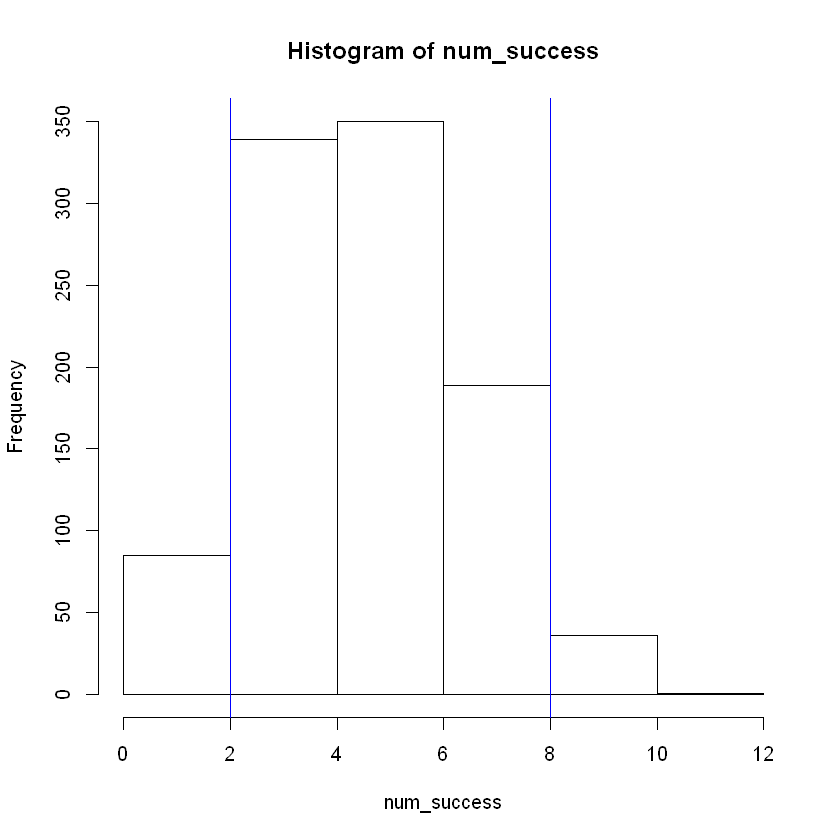

In [8]:
num_success <- c()       # create a vector to store the number of successes for each sample drawn
num_reps = 1000          # set the number of times to run the FOR LOOP

for (i in 1:num_reps){
    temp <- rflip(20, prob = 1/4, summarize = TRUE)[1,2]  # flip 20 coins, count numer of successes (heads)
    num_success[i] <- temp     # count and store the number of successes from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
hist(num_success, breaks = 8)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Results

We can see that the middle 90\% of the data fall roughly between 2 and 9, or in terms of intervals:

$$\text{Number of Successes }\in [2,9)$$

## Example 4: Increasing Number of Repetitions to 100,000

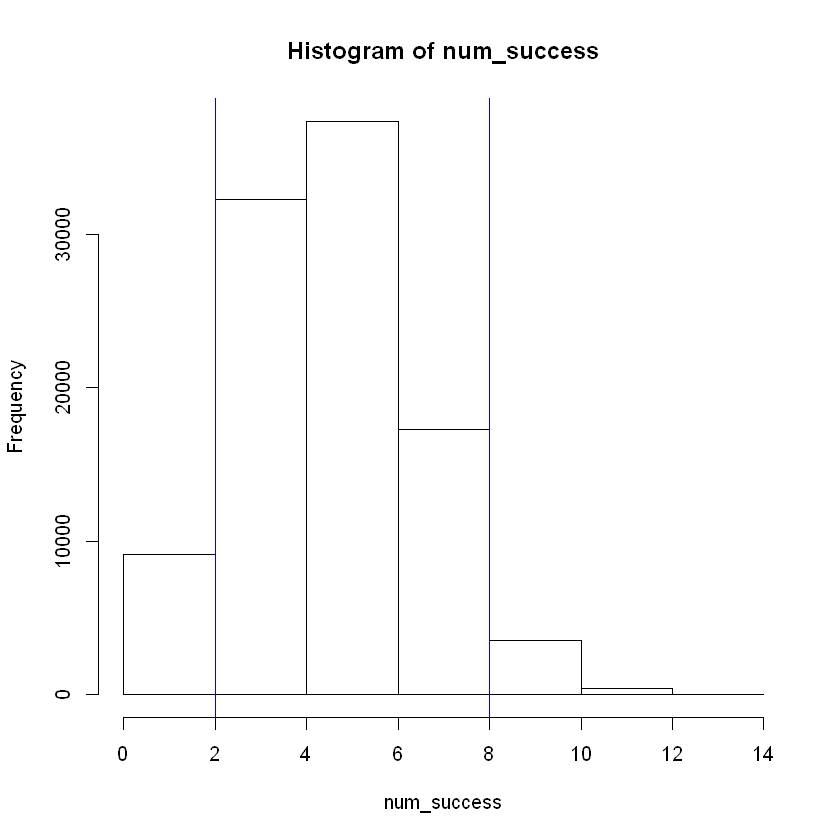

In [9]:
num_success <- c()       # create a vector to store the number of successes for each sample drawn
num_reps = 100000          # set the number of times to run the FOR LOOP

for (i in 1:num_reps){
    temp <- rflip(20, prob = 1/4, summarize = TRUE)[1,2]  # flip 20 coins, count numer of successes (heads)
    num_success[i] <- temp     # count and store the number of successes from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
hist(num_success, breaks = 8)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Results

The interval has narrowed due to increased repetitions as predicted by the Law of Large numbers. The new interval is as follows:

$$\text{Number of Successes }\in [2,8)$$